In [32]:
import pandas as pd
inpatient = pd.read_csv('../project/Train_Inpatientdata.csv')

In [33]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split  # not used here, we use <2015 and >=2015 to split data
# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# from sklearn.pipeline import FeatureUnion  # not sure which one to choose, the featureunion or the columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Set seed for reproducibility
seed1, seed2, seed3=101,67, 42

In [34]:
claimYear = pd.DatetimeIndex(inpatient['ClaimEndDt']).year

In [35]:
claimYear.unique()

Int64Index([2009], dtype='int64', name='ClaimEndDt')

In [36]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [37]:
outpatient = pd.read_csv('../project/Train_Outpatientdata.csv')

In [38]:
outpatient.head(25)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [9]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [39]:
beneficiary = pd.read_csv('../project/Train_Beneficiarydata.csv')
beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [7]:
provider = pd.read_csv('../project/Train.csv')
provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [129]:
provider[provider['PotentialFraud'] == 'Yes']

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes
...,...,...
5307,PRV57642,Yes
5324,PRV57667,Yes
5329,PRV57672,Yes
5351,PRV57697,Yes


In [22]:
for id in inpatient.BeneID:
    if id in outpatient.BeneID:
        print("find duplication", id)
print('done')

done


In [19]:
len(outpatient.ClaimID.drop_duplicates())

517737

In [24]:
len(inpatient.DiagnosisGroupCode.unique())

736

In [26]:
len(inpatient.ClmDiagnosisCode_1.unique())

2254

In [27]:
len(inpatient.ClmDiagnosisCode_2.unique())

2440

In [28]:
len(inpatient.ClmDiagnosisCode_3.unique())

2428

In [29]:
len(inpatient.ClmDiagnosisCode_4.unique())

2442

In [30]:
len(inpatient.ClmDiagnosisCode_5.unique())

2375

In [31]:
len(inpatient.ClmDiagnosisCode_6.unique())

2359

In [32]:
len(inpatient.ClmDiagnosisCode_7.unique())

2311

In [33]:
len(inpatient.ClmDiagnosisCode_8.unique())

2244

In [34]:
len(inpatient.ClmDiagnosisCode_9.unique())

2095

In [35]:
len(inpatient.ClmDiagnosisCode_10.unique())

953

In [36]:
len(inpatient.ClmProcedureCode_1.unique())

1118

In [37]:
len(inpatient.ClmProcedureCode_2.unique())

298

In [38]:
len(inpatient.ClmProcedureCode_3.unique())

155

In [39]:
len(inpatient.ClmProcedureCode_4.unique())

49

In [40]:
len(inpatient.ClmProcedureCode_5.unique())

7

In [41]:
len(inpatient.ClmProcedureCode_6.unique())

1

In [42]:
len(outpatient.ClmProcedureCode_1.unique())

81

In [43]:
len(outpatient.ClmProcedureCode_2.unique())

23

In [44]:
len(outpatient.ClmProcedureCode_3.unique())

5

In [45]:
len(outpatient.ClmProcedureCode_4.unique())

3

In [46]:
len(outpatient.ClmProcedureCode_5.unique())

1

In [47]:
len(outpatient.ClmProcedureCode_6.unique())

1

In [48]:
len(outpatient.ClmDiagnosisCode_1.unique())

10355

In [49]:
len(outpatient.ClmDiagnosisCode_2.unique())

5057

In [50]:
len(outpatient.ClmDiagnosisCode_3.unique())

4449

In [51]:
len(outpatient.ClmDiagnosisCode_4.unique())

3926

In [52]:
len(outpatient.ClmDiagnosisCode_5.unique())

3413

In [53]:
len(outpatient.ClmDiagnosisCode_6.unique())

2969

In [54]:
len(outpatient.ClmDiagnosisCode_7.unique())

2636

In [55]:
len(outpatient.ClmDiagnosisCode_8.unique())

2261

In [56]:
len(outpatient.ClmDiagnosisCode_9.unique())

1895

In [57]:
len(outpatient.ClmDiagnosisCode_10.unique())

496

In [62]:
le=LabelEncoder()

class Label_Transformer(object):
    def __init__(self):
        self.label={}
    
    def fit(self, X, y=None):
        self.cat_colnames=X.columns
        df=X.copy()
        for column_name in self.cat_colnames:
            keys=(X[column_name]).unique()
            values=np.arange(len(keys))
            res = {keys[i]: values[i] for i in range(len(keys))}
            self.label[column_name]=res
            df=df.replace({column_name: self.label[column_name]})
        self.mean=df.mean()
    
    def transform(self, X, y=None):
        df = X.copy()
        for column_name in self.cat_colnames:
            df=df.replace({column_name: self.label[column_name]})
            df[column_name]=pd.to_numeric(df[column_name], errors='coerce')
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)   

In [40]:
inpatient['In_Out']=1
outpatient['In_Out']=0


In [41]:
# union/concat the inpatient and outpatient data
concat_in_out=pd.concat([inpatient, outpatient],axis=0)
concat_in_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In_Out
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [42]:
merge_bene_df=concat_in_out.merge(beneficiary, on='BeneID', how='left')
merge_bene_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100


In [101]:
merge_bene_df.shape

(558211, 55)

In [43]:
merge_provider_df = merge_bene_df.merge(provider, on = 'Provider', how ='left')
merge_provider_df.shape

(558211, 56)

In [48]:
merge_df_transform = merge_provider_df.copy(deep=True)
display(merge_df_transform.head())


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [49]:
# calculte claimPeriod and HospitalizedDays
merge_df_transform['ClaimPeriod'] = (pd.to_datetime(merge_df_transform.ClaimEndDt) - pd.to_datetime(merge_df_transform.ClaimStartDt)).dt.days + 1
merge_df_transform['HospitalizedDays'] = (pd.to_datetime(merge_df_transform.DischargeDt) - pd.to_datetime(merge_df_transform.AdmissionDt)).dt.days + 1
# make hospitallized day 0 for outpatient
merge_df_transform['HospitalizedDays'] = merge_df_transform['HospitalizedDays'].apply(lambda x : 0 if pd.isna(x) else x )

In [30]:
#merge_df_transform.DOD.unique()

In [50]:
#calculate age and determine if a person is deceased. If the person is still alive, 
#use '2009-12-01' as the time we calculate age

from datetime import date, datetime
def calulateAge(dob, dod, calulationDate):
    born = datetime.strptime(dob, "%Y-%m-%d").date()
    if not pd.isna(dod):
        calulationDate = datetime.strptime(dod, "%Y-%m-%d").date()
    else:
        calulationDate = datetime.strptime(calulationDate, "%Y-%m-%d").date()
    return calulationDate.year - born.year - ((calulationDate.month, calulationDate.day) < (born.month, born.day))    


merge_df_transform['Deceased'] = merge_df_transform['DOD'].apply(lambda x : 0 if pd.isna(x) else 1) 
merge_df_transform['Age'] = merge_df_transform.apply(lambda x: calulateAge(dob = x['DOB'], dod = x['DOD'], calulationDate = '2009-12-01'), axis = 1)

In [ ]:
#Transform potential fraud to 1/0
merge_df_transform['PotentialFraud'] = merge_df_transform['PotentialFraud'].apply(lambda x : 1 if x == 'Yes' else 0)

In [51]:
#Drop unecessary columns
dropColumnList = ['ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD', ]
merge_df_transform.drop(axis = 1, columns=dropColumnList, inplace=True)
merge_df_transform

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimPeriod,HospitalizedDays,Deceased,Age
0,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,...,1,36000,3204,60,70,Yes,7,7.0,0,66
1,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,...,1,36000,3204,60,70,No,3,3.0,0,66
2,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,...,1,36000,3204,60,70,No,4,4.0,0,66
3,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,...,1,5000,1068,250,320,No,9,9.0,0,95
4,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,...,2,21260,2136,120,100,No,18,18.0,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,0.0,NaN,2163,...,2,0,0,5470,1870,No,1,NaN,0,57
558207,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,NaN,0.0,NaN,07041,...,2,0,0,5470,1870,No,1,NaN,0,57
558208,BENE159198,PRV53676,60,PHY361063,NaN,NaN,NaN,0.0,NaN,V570,...,2,0,0,5470,1870,No,1,NaN,0,57
558209,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,NaN,0.0,NaN,NaN,...,2,0,0,5470,1870,No,1,NaN,0,57


In [64]:
merge_df_transform.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'In_Out', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'Chro

In [52]:
'''Export to csv'''
# from pathlib import Path
# filepath = Path('../project/sampleData.csv')
# merge_df_transform.to_csv(filepath, index=False)

'Export to csv'

In [74]:
'''columns: list of columns ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']'''
def countCodeNumbers(df, columns):
    df_codes = merge_df_transform.loc[:, columns]
    codecount = df_codes.notnull().sum(axis=1)
    return codecount

diagnosis_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
           'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10' ]
procedure_code_columns = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

merge_df_transform['DiagnosisCodeCount'] = countCodeNumbers(merge_df_transform, diagnosis_code_columns)
merge_df_transform['ProcedureCodeCount'] = countCodeNumbers(merge_df_transform, procedure_code_columns)

['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']


In [82]:
merge_df_transform.loc[:, procedure_code_columns]

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In_Out,DiagnosisGroupCode
0,NaN,NaN,NaN,NaN,NaN,NaN,1,201
1,7092.0,NaN,NaN,NaN,NaN,NaN,1,750
2,NaN,NaN,NaN,NaN,NaN,NaN,1,883
3,331.0,NaN,NaN,NaN,NaN,NaN,1,067
4,3893.0,NaN,NaN,NaN,NaN,NaN,1,975
...,...,...,...,...,...,...,...,...
558206,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558207,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558208,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558209,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [104]:
merge_df_transform

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimPeriod,HospitalizedDays,Deceased,Age,DiagnosisCodeCount,ProcedureCodeCount
0,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,...,3204,60,70,1,7,7.0,0,66,9,0
1,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,...,3204,60,70,0,3,3.0,0,66,3,1
2,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,...,3204,60,70,0,4,4.0,0,66,6,0
3,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,...,1068,250,320,0,9,9.0,0,95,9,1
4,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,...,2136,120,100,0,18,18.0,0,71,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,0.0,-999,2163,...,0,5470,1870,0,1,0.0,0,57,3,0
558207,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,NaN,0.0,-999,07041,...,0,5470,1870,0,1,0.0,0,57,3,0
558208,BENE159198,PRV53676,60,PHY361063,NaN,NaN,NaN,0.0,-999,V570,...,0,5470,1870,0,1,0.0,0,57,2,0
558209,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,NaN,0.0,-999,NaN,...,0,5470,1870,0,1,0.0,0,57,0,0


In [102]:
len(merge_df_transform.State.unique())

52

In [103]:
merge_df_transform['DiagnosisGroupCode'] = merge_df_transform['DiagnosisGroupCode'].apply(lambda x: -999 if pd.isna(x) else x)

In [119]:
merge_df_transform[merge_df_transform['PotentialFraud'] == 1].AttendingPhysician.value_counts().nlargest(15)

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
PHY327046    1181
PHY338032    1158
PHY357120    1156
PHY337425    1156
PHY341578    1133
PHY432650    1093
PHY347064    1076
PHY383481    1005
PHY415321    1002
PHY344389    1000
PHY433436     924
PHY375453     880
PHY387126     762
PHY357307     737
PHY318667     711
PHY424712     693
PHY347780     678
PHY313278     674
PHY323447     664
PHY387026     647
PHY368630     637
PHY333735     634
PHY360043     627
PHY381249     615
PHY375219     609
PHY404832     596
PHY418434     585
PHY385072     582
PHY339530     563
PHY341452     561
PHY325906     547
PHY350610     535
PHY362200     528
PHY416732     504
PHY396637     503
PHY329600     503
PHY383336     502
PHY407400     501
PHY386363     500
PHY421058     499
PHY410597     490
PHY433374     483
PHY369122     482
PHY418441     481
PHY412121     480
Name: AttendingPhysician, dtype: int64

In [121]:
merge_df_transform[merge_df_transform['PotentialFraud'] == 0].AttendingPhysician.value_counts().nlargest(15)

PHY351121    1053
PHY375943     912
PHY432614     716
PHY326984     686
PHY362889     674
PHY389456     673
PHY367255     634
PHY373032     618
PHY356444     600
PHY360179     583
PHY405720     544
PHY387900     514
PHY430054     513
PHY342223     503
PHY361063     470
PHY388040     447
PHY326049     445
PHY403755     429
PHY351973     426
PHY318242     422
PHY328307     402
PHY322775     372
PHY374226     363
PHY424939     347
PHY415621     346
PHY405650     344
PHY366914     333
PHY394276     331
PHY340260     328
PHY423304     327
PHY319973     326
PHY341671     323
PHY422235     321
PHY388477     304
PHY348408     299
PHY345497     298
PHY328613     296
PHY365595     289
PHY420028     288
PHY324335     287
PHY427186     282
PHY388996     282
PHY333981     281
PHY425169     279
PHY377552     278
PHY341325     278
PHY371576     277
PHY352753     272
PHY363309     269
PHY366755     266
Name: AttendingPhysician, dtype: int64

In [107]:
merge_df_transform.AttendingPhysician.fillna('NotSpecified')
merge_df_transform.OperatingPhysician.fillna('NotSpecified')
merge_df_transform.OtherPhysician.fillna('NotSpecified')

0         NotSpecified
1         NotSpecified
2            PHY324689
3            PHY349768
4         NotSpecified
              ...     
558206       PHY385752
558207    NotSpecified
558208    NotSpecified
558209       PHY419379
558210       PHY419379
Name: OtherPhysician, Length: 558211, dtype: object

([<matplotlib.patches.Wedge at 0x1bb127070>,
 [Text(-0.4010440650777065, 1.0242869021255463, ''),
  Text(0.4010440650777066, -1.0242869021255463, '')])

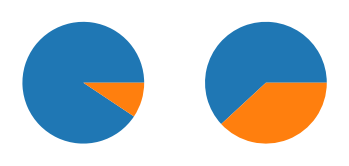

In [132]:
fig, ax = plt.subplots(1, 2)
ax[0].pie(provider.PotentialFraud.value_counts())
ax[1].pie(merge_df_transform.PotentialFraud.value_counts())


In [133]:
merge_df_transform.NoOfMonths_PartACov

0         12
1         12
2         12
3         12
4         12
          ..
558206    12
558207    12
558208    12
558209    12
558210    12
Name: NoOfMonths_PartACov, Length: 558211, dtype: int64

In [134]:
provider_aggregate = pd.DataFrame()
provider_aggregate['ChronicCond_Alzheimer'] = merge_provider_df.groupby('provider')

KeyError: 'provider'

In [155]:
yz_columns = ['Provider','PotentialFraud','ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'HospitalizedDays', 'Deceased', ]
merged_split_yz = merge_df_transform.loc[:, yz_columns]
merged_split_yz

,Provider,PotentialFraud,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,HospitalizedDays,Deceased
0,PRV55912,1,1,2,1,2,2,1,1,1,2,1,1,7.0,0
1,PRV55907,0,1,2,1,2,2,1,1,1,2,1,1,3.0,0
2,PRV56046,0,1,2,1,2,2,1,1,1,2,1,1,4.0,0
3,PRV52405,0,2,1,1,2,2,1,1,2,2,1,1,9.0,0
4,PRV56614,0,2,1,1,2,1,1,2,1,2,2,2,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV53699,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0
558207,PRV53702,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0
558208,PRV53676,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0
558209,PRV53689,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0


In [154]:
#1 means have chronic condition, 2 means does not have chronic condition
merged_split_yz.ChronicCond_Osteoporasis.value_counts()

2    380897
1    177314
Name: ChronicCond_Osteoporasis, dtype: int64

In [169]:
HospitalDays = merged_split_yz.groupby('Provider').agg(maxHospitalDays = ('HospitalizedDays', 'max'), 
                                                       medianHospitalDays = ('HospitalizedDays', 'median'),
                                                       aveHospitalDays = ('HospitalizedDays', 'mean'))
HospitalDays

,maxHospitalDays,medianHospitalDays,aveHospitalDays
Provider,,,
PRV51001,15.0,0.0,1.200000
PRV51003,28.0,0.0,2.893939
PRV51004,0.0,0.0,0.000000
PRV51005,0.0,0.0,0.000000
PRV51007,8.0,0.0,0.263889
...,...,...,...
PRV57759,0.0,0.0,0.000000
PRV57760,0.0,0.0,0.000000
PRV57761,0.0,0.0,0.000000


In [168]:
HospitalDays.medianHospitalDays.value_counts()

0.0     4796
4.0      128
5.0      100
3.0       76
6.0       61
2.0       41
4.5       31
7.0       25
3.5       23
5.5       21
1.0       17
8.0       16
6.5       10
9.0        9
2.5        9
1.5        6
7.5        5
10.0       4
14.0       3
18.0       3
20.0       3
12.0       3
8.5        3
10.5       2
9.5        2
0.5        2
16.0       2
13.0       2
14.5       1
21.0       1
11.5       1
19.5       1
11.0       1
36.0       1
25.0       1
Name: medianHospitalDays, dtype: int64

In [170]:
HospitalDays.aveHospitalDays.value_counts()

0.000000    3318
6.000000      23
2.000000      22
1.000000      21
4.000000      20
            ... 
1.652174       1
0.346154       1
0.783784       1
2.197917       1
7.272727       1
Name: aveHospitalDays, Length: 1577, dtype: int64

In [173]:
df_chronicCount = merged_split_yz.query('ChronicCond_Alzheimer == 1').groupby('Provider').agg(count1 = ('ChronicCond_Alzheimer', 'count'))
df_chronicCount

,count1
Provider,
PRV51001,15
PRV51003,56
PRV51004,64
PRV51005,426
PRV51007,26
...,...
PRV57758,2
PRV57759,14
PRV57760,3


In [187]:
df_chronicCount1 = merged_split_yz.groupby('Provider').agg(alzhemierTotal = ('ChronicCond_Alzheimer', 'count'))
df_chronicCount1

,alzhemierTotal
Provider,
PRV51001,25
PRV51003,132
PRV51004,149
PRV51005,1165
PRV51007,72
...,...
PRV57759,28
PRV57760,22
PRV57761,82


In [190]:
merged_split_yz.groupby('Provider').apply(lambda x: (x['ChronicCond_Alzheimer'] == 1).sum()/x['ChronicCond_Alzheimer'].count())


Provider
PRV51001    0.600000
PRV51003    0.424242
PRV51004    0.429530
PRV51005    0.365665
PRV51007    0.361111
              ...   
PRV57759    0.500000
PRV57760    0.136364
PRV57761    0.439024
PRV57762    0.000000
PRV57763    0.381356
Length: 5410, dtype: float64

In [191]:
provider_agg_df = pd.DataFrame()
provider_agg_df['Provider'] = provider.Provider

In [193]:
#Aggregate 
HospitalDays = merge_df_transform.groupby('Provider').agg(MaxHospitalDays = ('HospitalizedDays', 'max'), 
                                                       MedianHospitalDays = ('HospitalizedDays', 'median'),
                                                       MeanHospitalDays = ('HospitalizedDays', 'mean'))
provider_agg_df=provider_agg_df.merge(HospitalDays, on = 'Provider', how ='left')
provider_agg_df

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays
0,PRV51001,15.0,0.0,1.200000
1,PRV51003,28.0,0.0,2.893939
2,PRV51004,0.0,0.0,0.000000
3,PRV51005,0.0,0.0,0.000000
4,PRV51007,8.0,0.0,0.263889
...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000
5406,PRV57760,0.0,0.0,0.000000
5407,PRV57761,0.0,0.0,0.000000
5408,PRV57762,0.0,0.0,0.000000


In [197]:
chronic_lst = ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
for condition in chronic_lst:
    diesease = condition.split('_')[1]
    columnName = 'Chronic_' + diesease + '_Frac'
    provider_agg_df[columnName] = (merge_df_transform.groupby('Provider').apply(lambda x: (x[condition] == 1).sum()/x[condition].count())).values

In [199]:
provider_agg_df['Deceased_Frac'] = (merge_df_transform.groupby('Provider').apply(lambda x: (x['Deceased'] == 1).sum()/x['Deceased'].count())).values

In [200]:
provider_agg_df

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,PRV51001,15.0,0.0,1.200000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000
1,PRV51003,28.0,0.0,2.893939,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576
2,PRV51004,0.0,0.0,0.000000,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711
3,PRV51005,0.0,0.0,0.000000,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433
4,PRV51007,8.0,0.0,0.263889,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000,0.500000,0.714286,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000
5406,PRV57760,0.0,0.0,0.000000,0.136364,0.500000,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000
5407,PRV57761,0.0,0.0,0.000000,0.439024,0.682927,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195
5408,PRV57762,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [202]:
provider_agg_df['PotentialFraud'] = provider.PotentialFraud

In [203]:
provider_agg_df

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac,PotentialFraud
0,PRV51001,15.0,0.0,1.200000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000,No
1,PRV51003,28.0,0.0,2.893939,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576,Yes
2,PRV51004,0.0,0.0,0.000000,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711,No
3,PRV51005,0.0,0.0,0.000000,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433,Yes
4,PRV51007,8.0,0.0,0.263889,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000,0.500000,0.714286,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000,No
5406,PRV57760,0.0,0.0,0.000000,0.136364,0.500000,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000,No
5407,PRV57761,0.0,0.0,0.000000,0.439024,0.682927,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195,No
5408,PRV57762,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,No


In [204]:
provider_agg_fraud = provider_agg_df[provider_agg_df['PotentialFraud'] == 'Yes']

In [205]:
provider_agg_fraud

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac,PotentialFraud
1,PRV51003,28.0,0.0,2.893939,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576,Yes
3,PRV51005,0.0,0.0,0.000000,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433,Yes
13,PRV51021,18.0,0.0,0.649805,0.365759,0.564202,0.474708,0.233463,0.400778,0.451362,0.754864,0.762646,0.272374,0.330739,0.105058,0.003891,Yes
25,PRV51037,18.0,0.0,0.281938,0.429515,0.596916,0.398678,0.229075,0.341410,0.451542,0.685022,0.799559,0.370044,0.290749,0.063877,0.022026,Yes
37,PRV51052,15.0,0.0,0.434783,0.326087,0.630435,0.391304,0.130435,0.260870,0.413043,0.586957,0.695652,0.326087,0.282609,0.108696,0.000000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,PRV57642,24.0,0.0,0.768182,0.295455,0.531818,0.381818,0.159091,0.363636,0.500000,0.659091,0.645455,0.336364,0.200000,0.086364,0.018182,Yes
5324,PRV57667,22.0,9.0,12.000000,0.333333,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,Yes
5329,PRV57672,0.0,0.0,0.000000,0.364706,0.534118,0.423529,0.122353,0.268235,0.416471,0.663529,0.722353,0.284706,0.284706,0.094118,0.009412,Yes
5351,PRV57697,22.0,3.0,4.439394,0.469697,0.606061,0.469697,0.136364,0.303030,0.545455,0.757576,0.833333,0.318182,0.333333,0.121212,0.000000,Yes


In [206]:
provider_agg_non_fraud = provider_agg_df[provider_agg_df['PotentialFraud'] == 'No']

In [207]:
provider_agg_non_fraud

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac,PotentialFraud
0,PRV51001,15.0,0.0,1.200000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000,No
2,PRV51004,0.0,0.0,0.000000,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711,No
4,PRV51007,8.0,0.0,0.263889,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889,No
5,PRV51008,6.0,0.0,0.232558,0.395349,0.581395,0.325581,0.209302,0.209302,0.279070,0.697674,0.767442,0.255814,0.139535,0.046512,0.000000,No
6,PRV51011,6.0,0.0,0.103448,0.431034,0.637931,0.431034,0.068966,0.362069,0.534483,0.706897,0.758621,0.344828,0.275862,0.034483,0.017241,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000,0.500000,0.714286,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000,No
5406,PRV57760,0.0,0.0,0.000000,0.136364,0.500000,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000,No
5407,PRV57761,0.0,0.0,0.000000,0.439024,0.682927,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195,No
5408,PRV57762,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,No


In [210]:
provider_agg_fraud.MaxHospitalDays.mean()

24.620553359683793

In [211]:
provider_agg_non_fraud.MaxHospitalDays.mean()

4.813417618270799

In [212]:
provider_agg_fraud.MeanHospitalDays.mean()

2.3324044276015856

In [213]:
provider_agg_non_fraud.MeanHospitalDays.mean()

0.8453904410987998

<AxesSubplot:ylabel='Frequency'>

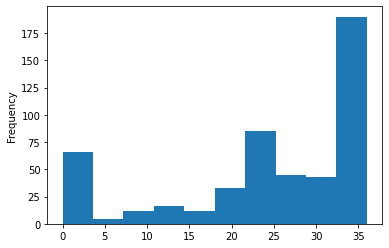

In [216]:
provider_agg_fraud.MaxHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

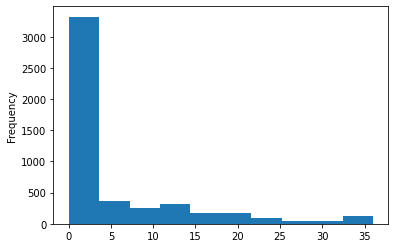

In [217]:
provider_agg_non_fraud.MaxHospitalDays.plot(kind='hist')

In [218]:
HospitalDays_In = merge_df_transform[merge_df_transform['In_Out'] == 1].groupby('Provider').agg(maxHospitalDays = ('HospitalizedDays', 'max'), 
                                                       medianHospitalDays = ('HospitalizedDays', 'median'),
                                                       aveHospitalDays = ('HospitalizedDays', 'mean'))
HospitalDays_In

,maxHospitalDays,medianHospitalDays,aveHospitalDays
Provider,,,
PRV51001,15.0,5.0,6.000000
PRV51003,28.0,5.0,6.161290
PRV51007,8.0,6.0,6.333333
PRV51008,6.0,5.0,5.000000
PRV51011,6.0,6.0,6.000000
...,...,...,...
PRV57719,36.0,10.5,14.750000
PRV57728,5.0,5.0,5.000000
PRV57729,16.0,6.0,6.545455


In [219]:
HospitalDays_In = HospitalDays_In.merge(provider, on = 'Provider', how ='left' )
HospitalDays_In

,Provider,maxHospitalDays,medianHospitalDays,aveHospitalDays,PotentialFraud
0,PRV51001,15.0,5.0,6.000000,No
1,PRV51003,28.0,5.0,6.161290,Yes
2,PRV51007,8.0,6.0,6.333333,No
3,PRV51008,6.0,5.0,5.000000,No
4,PRV51011,6.0,6.0,6.000000,No
...,...,...,...,...,...
2087,PRV57719,36.0,10.5,14.750000,No
2088,PRV57728,5.0,5.0,5.000000,No
2089,PRV57729,16.0,6.0,6.545455,No
2090,PRV57732,18.0,4.0,6.272727,No


In [221]:
HospitalDays_In_Fraud = HospitalDays_In[HospitalDays_In['PotentialFraud'] == 'Yes']
HospitalDays_In_Fraud

,Provider,maxHospitalDays,medianHospitalDays,aveHospitalDays,PotentialFraud
1,PRV51003,28.0,5.0,6.161290,Yes
5,PRV51021,18.0,5.0,5.758621,Yes
12,PRV51037,18.0,4.0,5.565217,Yes
17,PRV51052,15.0,10.0,10.000000,Yes
22,PRV51059,36.0,6.0,7.880000,Yes
...,...,...,...,...,...
2065,PRV57631,33.0,5.0,6.388889,Yes
2074,PRV57642,24.0,4.0,7.347826,Yes
2077,PRV57667,22.0,9.0,12.000000,Yes
2078,PRV57697,22.0,4.0,6.104167,Yes


In [222]:
HospitalDays_In_Non_Fraud = HospitalDays_In[HospitalDays_In['PotentialFraud'] == 'No']
HospitalDays_In_Non_Fraud

,Provider,maxHospitalDays,medianHospitalDays,aveHospitalDays,PotentialFraud
0,PRV51001,15.0,5.0,6.000000,No
2,PRV51007,8.0,6.0,6.333333,No
3,PRV51008,6.0,5.0,5.000000,No
4,PRV51011,6.0,6.0,6.000000,No
6,PRV51023,11.0,4.0,4.555556,No
...,...,...,...,...,...
2087,PRV57719,36.0,10.5,14.750000,No
2088,PRV57728,5.0,5.0,5.000000,No
2089,PRV57729,16.0,6.0,6.545455,No
2090,PRV57732,18.0,4.0,6.272727,No


<AxesSubplot:ylabel='Frequency'>

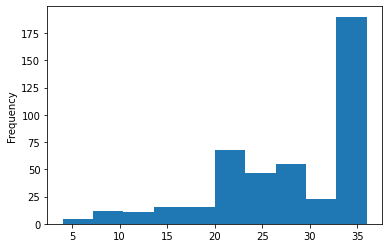

In [224]:
HospitalDays_In_Fraud.maxHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

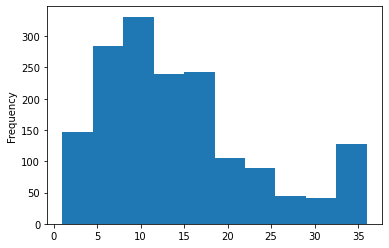

In [225]:
HospitalDays_In_Non_Fraud.maxHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

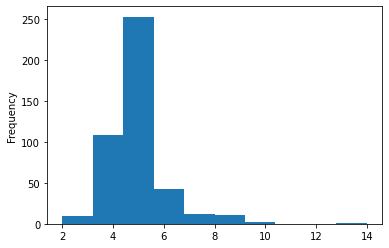

In [226]:
HospitalDays_In_Fraud.medianHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

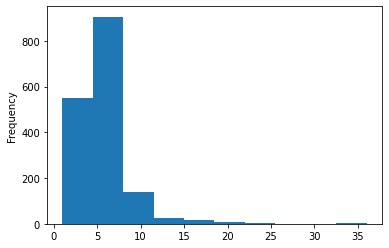

In [227]:
HospitalDays_In_Non_Fraud.medianHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

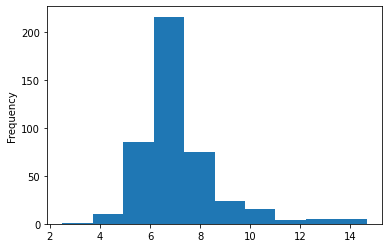

In [228]:
HospitalDays_In_Fraud.aveHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

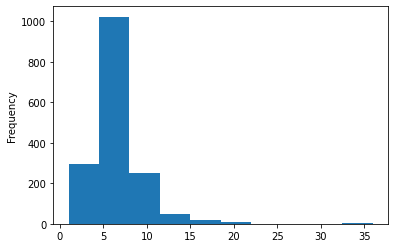

In [229]:
HospitalDays_In_Non_Fraud.aveHospitalDays.plot(kind='hist')